In [15]:
# Specify the name that is used to seach for the data
place_name = "Ступино, Московская область, RU"

In [16]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [20]:
!pip install contextily
import contextily as cx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import geopandas as gpd
import numpy as np
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd
from shapely.geometry import Polygon
from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [22]:

area

geometry  bbox_north  bbox_south  \
0  POLYGON ((37.98761 54.94530, 37.98814 54.94432...   54.947919   54.840718   

   bbox_east  bbox_west   place_id osm_type    osm_id        lat        lon  \
0  38.199155  37.987605  115321129      way  37094231  54.886598  38.077259   

                                        display_name  class  type  importance  
0  Stupino, City district Stupino, Moscow Oblast,...  place  town    0.597641

In [23]:
type(area.geometry)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geoseries.GeoSeries

<Axes: >

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


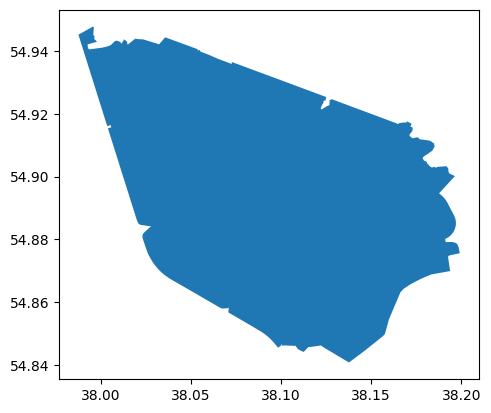

In [24]:
area.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


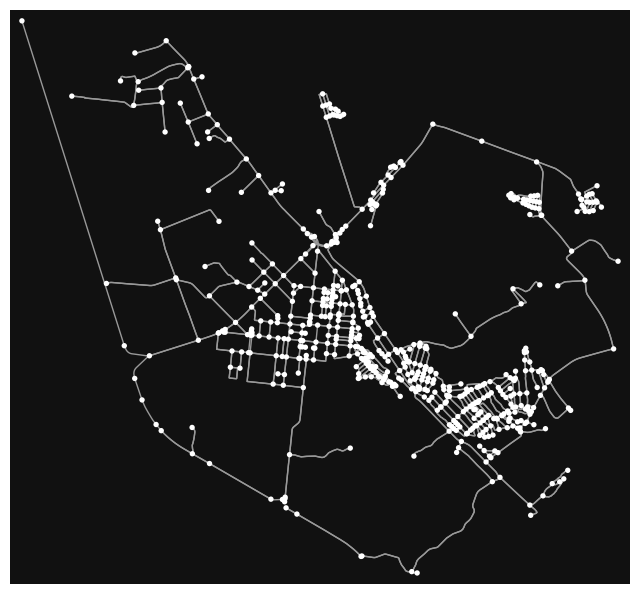

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [25]:
drive = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(drive)

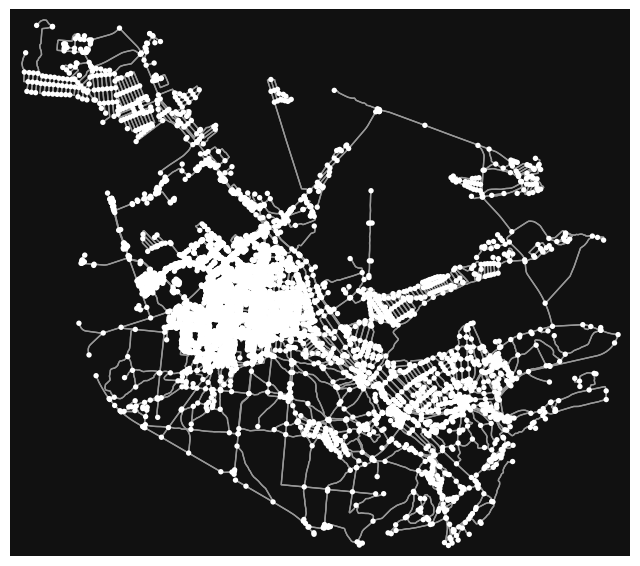

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [26]:
walk = ox.graph_from_place(place_name, network_type='walk')
ox.plot_graph(walk)

In [27]:
# tags = {'amenity': True, 'landuse': ['retail', 'commercial'], 'shop': True, 'office': True, 'tourism': True} 
tags = {'highway': 'bus_stop',
    'building': ['apartments', 'detached', 'dormitory', 'house', 'residential', 'semidetached_house', 'commercial', 'kiosk', 'retail', "supermarket", 'train_station'],
    'railway': ['station', 'subway_entrance', 'tram_stop'],  
    'amenity': ['bar', 'cafe', 'fast_food', 'food_court', 'pub', 'restaurant', 'college', 'driving_school', 
                'language_school', 'school', 'kindergarten', 'university', 'car_wash', 'fuel', 'atm', 
                'bank', 'clinic', 'dentist', 'doctors', 'hospital', 'pharmacy', 'veterinary', 'theatre', 'cinema'], 
    'tourism': ['hostel', 'hotel']
 }

items = ox.geometries_from_place(place_name, tags)
items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


esr:user express:user                          name  \
element_type osmid                                                           
node         403775091   192003      2001138                          Акри   
             439193855      NaN          NaN                 Hotel Central   
             446218402      NaN          NaN                    BP Ступино   
             446266808      NaN          NaN                           NaN   
             446903926      NaN          NaN                          Очаг   
...                         ...          ...                           ...   
relation     6028588        NaN          NaN     Детский сад №23 "Ромашка"   
             7136244        NaN          NaN                Поликлиника №8   
             14184727       NaN          NaN                           NaN   
             14184732       NaN          NaN                           NaN   
             15892702       NaN          NaN  Детский сад №28 "Дельфинчик"   

                       name:en                    operator public_transport  \
element_type osmid                                                            
node         403775091    Akri  Московская железная дорога          station   
             439193855     NaN                         NaN              NaN   
             446218402     NaN                          BP              NaN   
             446266808     NaN                         NaN              NaN   
             446903926     NaN                         NaN              NaN   
...                        ...                         ...              ...   
relation     6028588       NaN                         NaN              NaN   
             7136244       NaN                         NaN              NaN   
             14184727      NaN                         NaN              NaN   
             14184732      NaN                         NaN              NaN   
             15892702      NaN                         NaN              NaN   

                        railway train  wikidata  \
element_type osmid                                
node         403775091  station   yes  Q4059794   
             439193855      NaN   NaN       NaN   
             446218402      NaN   NaN       NaN   
             446266808      NaN   NaN       NaN   
             446903926      NaN   NaN       NaN   
...                         ...   ...       ...   
relation     6028588        NaN   NaN       NaN   
             7136244        NaN   NaN       NaN   
             14184727       NaN   NaN       NaN   
             14184732       NaN   NaN       NaN   
             15892702       NaN   NaN       NaN   

                                                                 geometry  \
element_type osmid                                                          
node         403775091                          POINT (38.11885 54.87351)   
             439193855                          POINT (38.07850 54.88546)   
             446218402                          POINT (38.08016 54.90018)   
             446266808                          POINT (38.07686 54.90918)   
             446903926                          POINT (38.14709 54.87113)   
...                                                                   ...   
relation     6028588    POLYGON ((38.05707 54.88577, 38.05722 54.88658...   
             7136244    POLYGON ((38.05598 54.88682, 38.05601 54.88699...   
             14184727   POLYGON ((38.05542 54.88067, 38.05545 54.88086...   
             14184732   POLYGON ((38.05538 54.88040, 38.05540 54.88053...   
             15892702   POLYGON ((38.05655 54.88086, 38.05647 54.88087...   

                        ... building:parts building:part capacity disused  \
element_type osmid      ...                                                 
node         403775091  ...            NaN           NaN      NaN     NaN   
             439193855  ...            NaN           NaN      NaN     NaN   
      

In [28]:
df_wm = items.to_crs(epsg=3857)

In [29]:
df_wm

esr:user express:user                          name  \
element_type osmid                                                           
node         403775091   192003      2001138                          Акри   
             439193855      NaN          NaN                 Hotel Central   
             446218402      NaN          NaN                    BP Ступино   
             446266808      NaN          NaN                           NaN   
             446903926      NaN          NaN                          Очаг   
...                         ...          ...                           ...   
relation     6028588        NaN          NaN     Детский сад №23 "Ромашка"   
             7136244        NaN          NaN                Поликлиника №8   
             14184727       NaN          NaN                           NaN   
             14184732       NaN          NaN                           NaN   
             15892702       NaN          NaN  Детский сад №28 "Дельфинчик"   

                       name:en                    operator public_transport  \
element_type osmid                                                            
node         403775091    Akri  Московская железная дорога          station   
             439193855     NaN                         NaN              NaN   
             446218402     NaN                          BP              NaN   
             446266808     NaN                         NaN              NaN   
             446903926     NaN                         NaN              NaN   
...                        ...                         ...              ...   
relation     6028588       NaN                         NaN              NaN   
             7136244       NaN                         NaN              NaN   
             14184727      NaN                         NaN              NaN   
             14184732      NaN                         NaN              NaN   
             15892702      NaN                         NaN              NaN   

                        railway train  wikidata  \
element_type osmid                                
node         403775091  station   yes  Q4059794   
             439193855      NaN   NaN       NaN   
             446218402      NaN   NaN       NaN   
             446266808      NaN   NaN       NaN   
             446903926      NaN   NaN       NaN   
...                         ...   ...       ...   
relation     6028588        NaN   NaN       NaN   
             7136244        NaN   NaN       NaN   
             14184727       NaN   NaN       NaN   
             14184732       NaN   NaN       NaN   
             15892702       NaN   NaN       NaN   

                                                                 geometry  \
element_type osmid                                                          
node         403775091                    POINT (4243370.526 7337356.298)   
             439193855                    POINT (4238879.252 7339667.661)   
             446218402                    POINT (4239063.609 7342516.712)   
             446266808                    POINT (4238697.078 7344258.981)   
             446903926                    POINT (4246514.846 7336895.582)   
...                                                                   ...   
relation     6028588    POLYGON ((4236493.731 7339728.583, 4236510.452...   
             7136244    POLYGON ((4236372.504 7339930.204, 4236376.189...   
             14184727   POLYGON ((4236310.143 7338740.913, 4236313.405...   
             14184732   POLYGON ((4236305.401 7338688.376, 4236307.772...   
             15892702   POLYGON ((4236435.912 7338778.665, 4236427.274...   

                        ... building:parts building:part capacity disused  \
element_type osmid      ...                                                 
node         403775091  ...            NaN           NaN      NaN     NaN   
             439193855  ...            NaN           NaN      NaN     NaN   
      

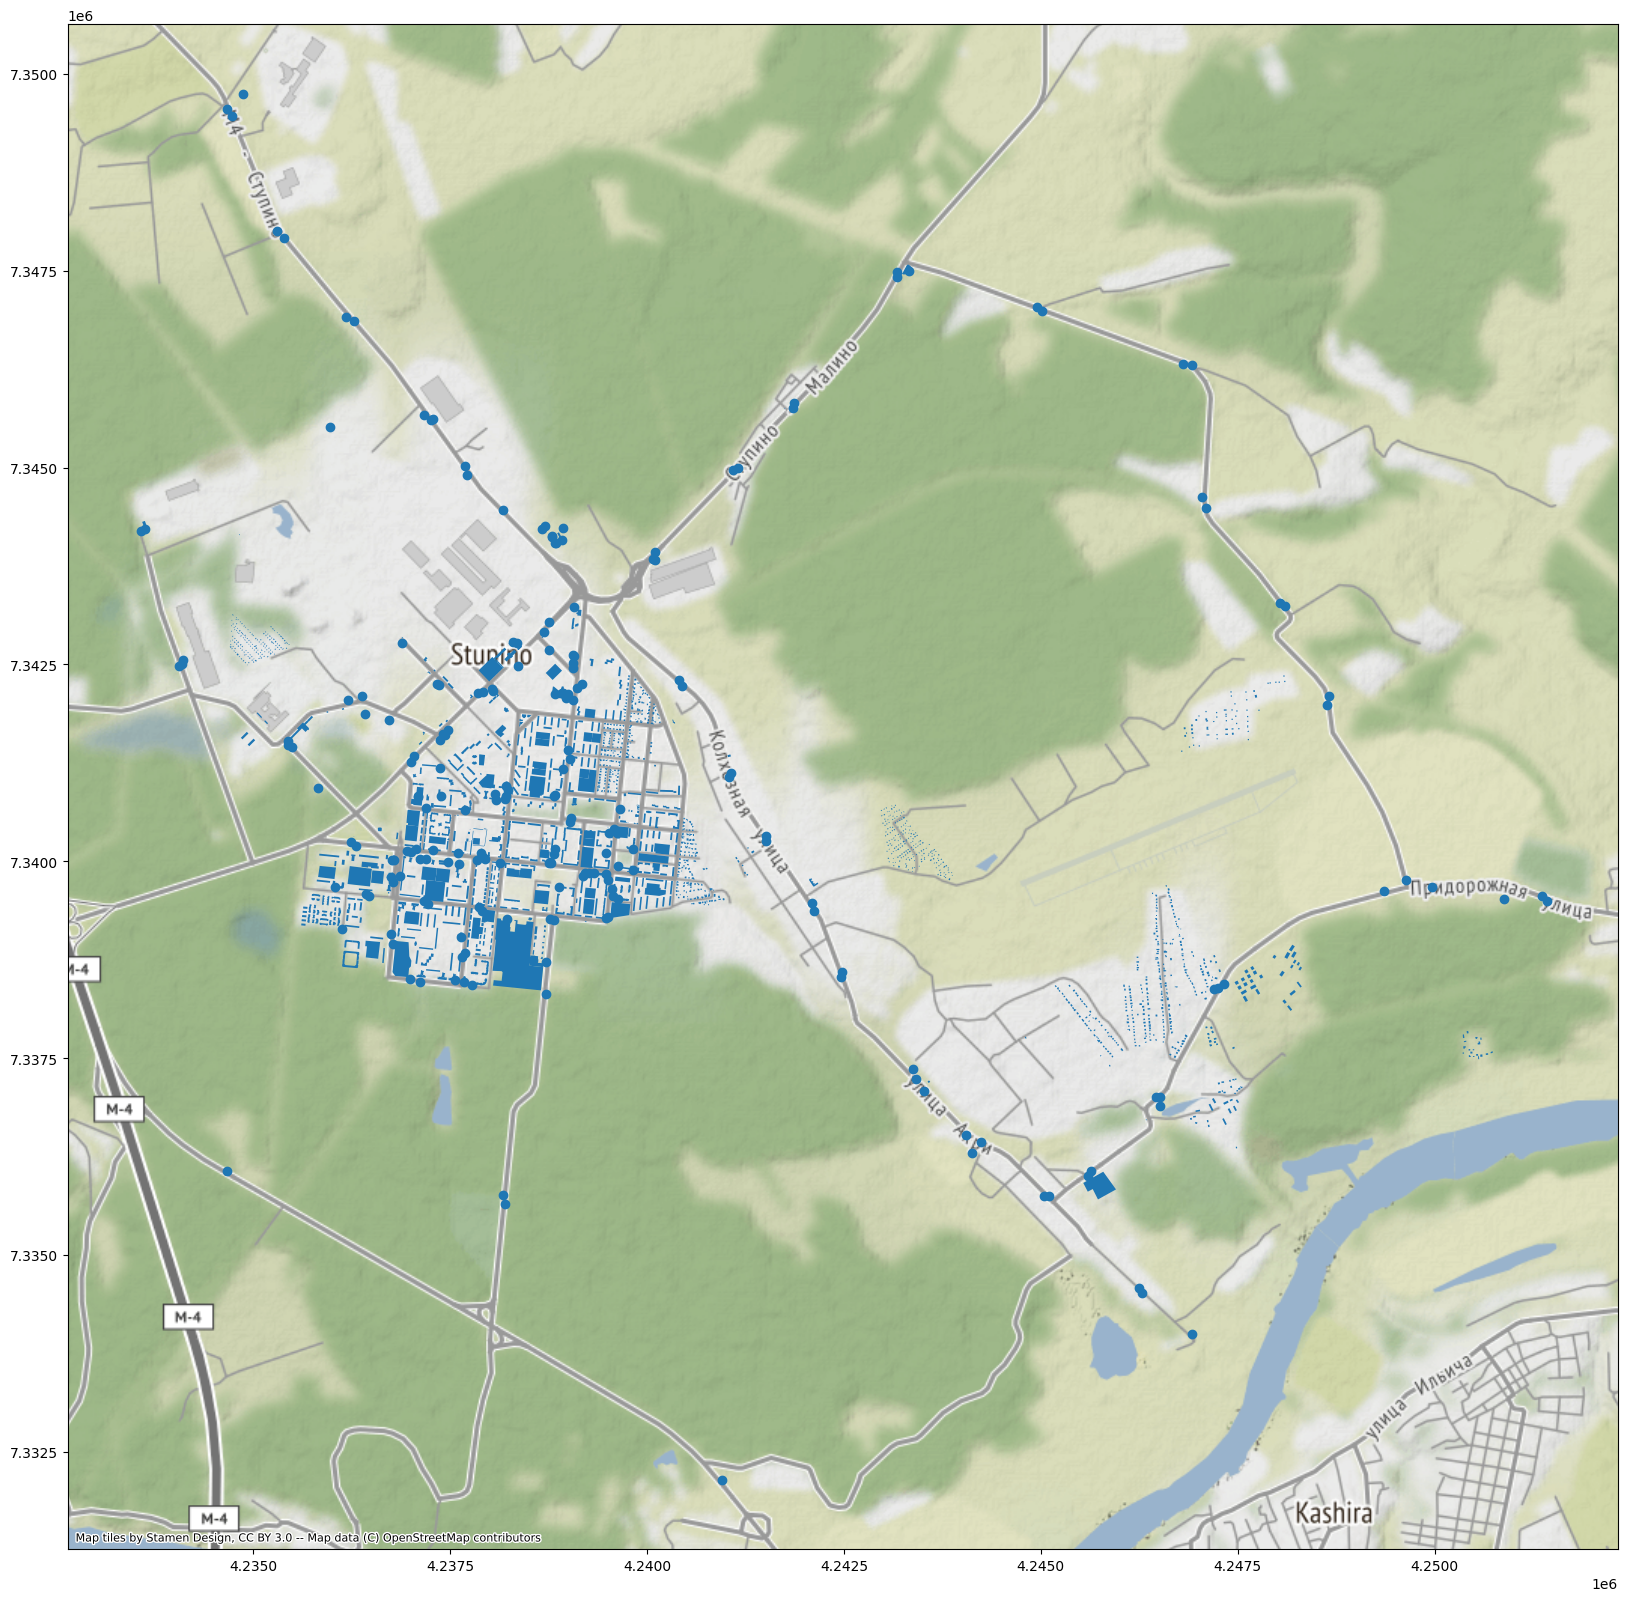

In [30]:
item_plot = df_wm.plot(figsize=(20,20), alpha = 1)
cx.add_basemap(item_plot)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLite)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.WaterColor)
# cx.add_basemap(item_plot, source=cx.providers.Stamen.TonerLabels)

In [31]:
df_wm = items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
list(df_wm.columns)

['esr:user',
 'express:user',
 'name',
 'name:en',
 'operator',
 'public_transport',
 'railway',
 'train',
 'wikidata',
 'geometry',
 'tourism',
 'amenity',
 'opening_hours',
 'bench',
 'bin',
 'bus',
 'covered',
 'highway',
 'shelter',
 'wheelchair',
 'check_date:bench',
 'tactile_paving',
 'lit',
 'brand',
 'contact:website',
 'owner',
 'fuel:diesel',
 'fuel:octane_92',
 'fuel:octane_95',
 'payment:cards',
 'ref',
 'shop',
 'toilets',
 'website',
 'atm',
 'addr:city',
 'addr:housenumber',
 'addr:street',
 'cuisine',
 'int_name',
 'internet_access',
 'contact:email',
 'contact:facebook',
 'contact:instagram',
 'contact:ok',
 'contact:vk',
 'name:ru',
 'check_date:shelter',
 'addr:country',
 'contact:phone',
 'diet:vegetarian',
 'drive_through',
 'old_name',
 'old_name:en',
 'outdoor_seating',
 'smoking',
 'takeaway',
 'fuel:lpg',
 'brand:en',
 'brand:ru',
 'brand:wikidata',
 'bic',
 'brand:wikipedia',
 'contact:twitter',
 'contact:youtube',
 'operator:wikidata',
 'operator:wikipedia',

In [33]:
type(df_wm)

geopandas.geodataframe.GeoDataFrame

In [34]:
print(df_wm["amenity"].unique ())

[nan 'fuel' 'car_wash' 'restaurant' 'pharmacy' 'cinema' 'cafe' 'bank'
 'fast_food' 'kindergarten' 'veterinary' 'clinic' 'atm' 'theatre'
 'dentist' 'pub' 'driving_school' 'bar' 'doctors' 'school' 'university'
 'college' 'hospital']


In [35]:
for i in ['library', 'police', 'bench', 'bench_basket', 'bus_station', 'courthouse', 'place_of_worship', 'fontain', 'customs', 'townhail', 'fire_station', 'monastery' ]:
  df_filter_amenity = df_wm[items.amenity != i]

In [36]:
print(df_filter_amenity["tourism"].unique ())

[nan 'hostel' 'hotel']


In [37]:
for i in ['attraction', 'information' ]:
  df_filter_tourism = df_filter_amenity[df_filter_amenity.amenity != i]

In [43]:
print(df_filter_tourism["office"].unique ())

KeyError: ignored

In [ ]:
for i in ['government']:
  df_filter_office = df_filter_tourism[df_filter_tourism.amenity != i]

In [ ]:
print(df_filter_office["shop"].unique ())

In [44]:
import geopandas as gpd
import numpy as np
import json
import h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd
from shapely.geometry import Polygon
from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [45]:
import matplotlib.pyplot as plt

In [57]:
# df1 = df_filter_office
df1 = items

In [58]:
df1['geometry']

element_type  osmid    
node          403775091    POINT (38.11885 54.87351)
              439193855    POINT (38.07850 54.88546)
              446218402    POINT (38.08016 54.90018)
              446266808    POINT (38.07686 54.90918)
              446903926    POINT (38.14709 54.87113)
                                     ...            
relation      6028588      POINT (38.05782 54.88614)
              7136244      POINT (38.05696 54.88693)
              14184727     POINT (38.05482 54.88108)
              14184732     POINT (38.05469 54.88038)
              15892702     POINT (38.05725 54.88139)
Name: geometry, Length: 1932, dtype: geometry

In [42]:
# df1['center_point'] = df1['geometry'].centroid
# #Extract lat and lon from the centerpoint
# df_wm["long"] = df_wm.Center_point.map(lambda p: p.x)
# df_wm["lat"] = df_wm.Center_point.map(lambda p: p.y)

In [59]:
df1['geometry'] = df1['geometry'].centroid

<ipython-input-59-404b0d52eb58>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['geometry'] = df1['geometry'].centroid


In [60]:
df1['geometry']

element_type  osmid    
node          403775091    POINT (38.11885 54.87351)
              439193855    POINT (38.07850 54.88546)
              446218402    POINT (38.08016 54.90018)
              446266808    POINT (38.07686 54.90918)
              446903926    POINT (38.14709 54.87113)
                                     ...            
relation      6028588      POINT (38.05782 54.88614)
              7136244      POINT (38.05696 54.88693)
              14184727     POINT (38.05482 54.88108)
              14184732     POINT (38.05469 54.88038)
              15892702     POINT (38.05725 54.88139)
Name: geometry, Length: 1932, dtype: geometry

In [ ]:
# df1 = pd.DataFrame(df_wm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
H3_res = 9  # размер гексагона [1 .. 15] чем больше, тем меньше площадь


def geo_to_h3(row):
    return h3.geo_to_h3(lat=row.geometry.y, lng=row.geometry.x, resolution=H3_res)


df1['h3_cell'] = df1.apply(geo_to_h3, axis=1)

In [88]:
df1.to_csv('locations.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [67]:
df_supermarkets = df1.loc[df1['shop'] == 'supermarket']

In [68]:
df_tmp = df1
df_tmp = df_tmp.reset_index()

In [69]:
len(df_tmp.h3_cell.unique())

168

In [87]:
from shapely.geometry import Polygon

from geojson import Feature, Point, FeatureCollection, Polygon
import plotly.express as px

def hexagons_dataframe_to_geojson(df_hex, hex_id_field,geometry_field, value_field,file_output = None):

    list_features = []

    for i, row in df_hex.iterrows():
        feature = Feature(geometry = row[geometry_field],
                          id = row[hex_id_field],
                          properties = {"value": row[value_field]})
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    if file_output is not None:
        with open(file_output, "w") as f:
            json.dump(feat_collection, f)

    else :
      return feat_collection

def add_geometry(row):
  points = h3.h3_to_geo_boundary(row['h3_cell'], True)
  return Polygon(points)

df_g = (df_tmp
          .groupby('h3_cell')
          .osmid
          .agg(list)
          .to_frame("ids")
          .reset_index())
# Let's count each points inside the hexagon
df_g['count'] =(df_g['ids']
                      .apply(lambda df_ids:len(df_ids)))
df_g.sort_values('count',ascending=False)
df_tmp.reset_index()

index element_type      osmid esr:user express:user  \
0         0         node  403775091   192003      2001138   
1         1         node  439193855      NaN          NaN   
2         2         node  446218402      NaN          NaN   
3         3         node  446266808      NaN          NaN   
4         4         node  446903926      NaN          NaN   
...     ...          ...        ...      ...          ...   
1927   1927     relation    6028588      NaN          NaN   
1928   1928     relation    7136244      NaN          NaN   
1929   1929     relation   14184727      NaN          NaN   
1930   1930     relation   14184732      NaN          NaN   
1931   1931     relation   15892702      NaN          NaN   

                              name name:en                    operator  \
0                             Акри    Akri  Московская железная дорога   
1                    Hotel Central     NaN                         NaN   
2                       BP Ступино     NaN                          BP   
3                              NaN     NaN                         NaN   
4                             Очаг     NaN                         NaN   
...                            ...     ...                         ...   
1927     Детский сад №23 "Ромашка"     NaN                         NaN   
1928                Поликлиника №8     NaN                         NaN   
1929                           NaN     NaN                         NaN   
1930                           NaN     NaN                         NaN   
1931  Детский сад №28 "Дельфинчик"     NaN                         NaN   

     public_transport  railway  ... building:part capacity disused  \
0             station  station  ...           NaN      NaN     NaN   
1                 NaN      NaN  ...           NaN      NaN     NaN   
2                 NaN      NaN  ...           NaN      NaN     NaN   
3                 NaN      NaN  ...           NaN      NaN     NaN   
4                 NaN      NaN  ...           NaN      NaN     NaN   
...               ...      ...  ...           ...      ...     ...   
1927              NaN      NaN  ...           NaN      NaN     NaN   
1928              NaN      NaN  ...           NaN      NaN     NaN   
1929              NaN      NaN  ...           NaN      NaN     NaN   
1930              NaN      NaN  ...           NaN      NaN     NaN   
1931              NaN      NaN  ...           NaN      NaN     NaN   

                                                   ways          type  \
0                                                   NaN           NaN   
1                                                   NaN           NaN   
2                                                   NaN           NaN   
3                                                   NaN           NaN   
4                                                   NaN           NaN   
...                                                 ...           ...   
1927                             [401865876, 401862031]  multipolygon   
1928  [484989472, 401923444, 484989469, 484989471, 4...  multipolygon   
1929                            [1063932181, 432581694]  multipolygon   
1930    [432581705, 1063932193, 1063932181, 1063932180]  multipolygon   
1931                            [414680937, 1175172657]  multipolygon   

     health_facility:type building:flats energy_class  start_date  \
0                     NaN            NaN          NaN         NaN   
1                     NaN            NaN          NaN         NaN   
2                     NaN            NaN          NaN         NaN   
3                     NaN            NaN          NaN         NaN   
4                     NaN            NaN          NaN         NaN   
...                   ...            ...          ...         ...   
1927                  NaN            NaN          NaN         NaN   
1928               clinic            NaN          NaN         NaN   
1929                  NaN            491     

In [81]:
type(df_tmp)

geopandas.geodataframe.GeoDataFrame

In [82]:
locs_df_g = (df_tmp
          .groupby('h3_cell')
          .osmid
          .agg(list)
          .to_frame("ids")
          .reset_index())

locs_df_g['count'] = (locs_df_g['ids']
                      .progress_apply(lambda ignition_ids: len(ignition_ids)))

locs_df_g['geometry'] = (locs_df_g
                         .progress_apply(add_geometry, axis=1))

100%|██████████| 168/168 [00:00<00:00, 10120.26it/s]


In [71]:
#Apply function into our dataframe
# df_g['geometry'] = (df_g
                        # .apply(add_geometry,axis=1))


In [83]:
geojson_obj = (hexagons_dataframe_to_geojson
                (df_g,
                 hex_id_field='h3_cell',
                 value_field='count',
                 geometry_field='geometry'))

In [86]:
locs_df_g

h3_cell                                                ids  \
0    8911810882bffff     [4077410041, 4369350408, 405978463, 405993835]   
1    89118108933ffff                                       [1670547907]   
2    8911810893bffff                                       [3688879673]   
3    89118108967ffff                           [1670547880, 3688879672]   
4    891181089a7ffff                           [1670547909, 1670547912]   
..               ...                                                ...   
163  89118172e1bffff  [475598397, 475598398, 475598399, 475598400, 4...   
164  89118172e3bffff                                       [1656484653]   
165  89118172eabffff                           [1656484687, 1656484694]   
166  89118172ec7ffff  [475598384, 475598385, 475598386, 475598387, 4...   
167  89118173507ffff                                       [1704238413]   

     count                                           geometry  
0        4  {'type': 'Polygon', 'coordinates': [[38.027491...  
1        1  {'type': 'Polygon', 'coordinates': [[38.042182...  
2        1  {'type': 'Polygon', 'coordinates': [[38.044141...  
3        2  {'type': 'Polygon', 'coordinates': [[38.051163...  
4        2  {'type': 'Polygon', 'coordinates': [[38.038262...  
..     ...                                                ...  
163     11  {'type': 'Polygon', 'coordinates': [[38.152865...  
164      1  {'type': 'Polygon', 'coordinates': [[38.164149...  
165      2  {'type': 'Polygon', 'coordinates': [[38.157134...  
166     14  {'type': 'Polygon', 'coordinates': [[38.147803...  
167      1  {'type': 'Polygon', 'coordinates': [[38.093856...  

[168 rows x 4 columns]

In [84]:
fig = (px.choropleth_mapbox(
                    locs_df_g, 
                    geojson=geojson_obj, 
                    locations='h3_cell', 
                    color='count',
                    color_continuous_scale="Viridis",
                    range_color=(0,locs_df_g['count'].mean()),                  
                    mapbox_style='carto-positron',
                    zoom=10,
                    center = {"lat": 54.886280, "lon": 38.078237 },
                    opacity=0.7,
                    labels={'count':'# количество объектов '}))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# aa = list(set(df1['amenity']))
# ak = {i: k for k, i in enumerate(aa)}
# aki = {k:i for k, i in enumerate(aa)}

In [ ]:
# def aggr(amenities, aa=aa, ak=ak):
#   a = np.zeros(len(aa))
#   for i in amenities:
#     a[ak[i]] +=1
#   return 

In [ ]:
# # df1_g = df1.groupby("h3_cell")["amenity"]
# # list(df1.columns)
# # df1[['fuel:diesel','fuel:octane_92','fuel:octane_95','shop', 'parking']]
# df1_c = df1.groupby("h3_cell")["amenity"].apply(aggr).reset_index()

In [ ]:
# df1_c

In [ ]:
# ams = pd.DataFrame(df1_c.amenity.to_list(), index= df1_c.h3_cell)
# ams.rename(columns=aki, inplace=True)
# ams

In [ ]:
# ams.reset_index()

In [ ]:
df1_g.columns

Index(['h3_cell', 'osmid'], dtype='object')

In [ ]:
df1_g.rename(columns = {'h3_cell':'h3_cell','osmid':'count'}, inplace = True )

In [ ]:
# df1_g = (df1
#         .groupby('h3_cell')
#       )
# # Let's count each points inside the hexagon

In [ ]:
df1_g

h3_cell  count                                           geometry
0    8a2da9920907fff     16  POLYGON ((38.05218020142331 38.05387442129382,...
1    8a2da992090ffff     16  POLYGON ((38.05349939108837 38.054482862789584...
2    8a2da9920917fff      5  POLYGON ((38.05222183650425 38.05263727463672,...
3    8a2da9920947fff     16  POLYGON ((38.05477698634001 38.056328402789454...
4    8a2da992094ffff     22  POLYGON ((38.056096206062996 38.05693679123518...
..               ...    ...                                                ...
112  8a2dad2de2dffff      1  POLYGON ((38.124844613221065 38.12500867642995...
113  8a2dad2de70ffff      5  POLYGON ((38.11700589763435 38.11889368507298,...
114  8a2dad2de71ffff      2  POLYGON ((38.117046671190145 38.11765721753874...
115  8a2dad2de757fff     10  POLYGON ((38.1183258911238 38.11950077180554, ...
116  8a2dad2de75ffff      8  POLYGON ((38.11964589065713 38.120107836454814...

[117 rows x 3 columns]

In [ ]:
from shapely.geometry import Polygon

def add_geometry(row):
    points = h3.h3_to_geo_boundary(row['h3_cell'], True)
    return Polygon(points)

In [ ]:
df1_g['geometry'] = (df1_g.progress_apply(add_geometry, axis=1))

100%|██████████| 117/117 [00:00<00:00, 8268.75it/s]


In [ ]:
df1_g['geometry']

0      POLYGON ((38.05218020142331 38.05387442129382,...
1      POLYGON ((38.05349939108837 38.054482862789584...
2      POLYGON ((38.05222183650425 38.05263727463672,...
3      POLYGON ((38.05477698634001 38.056328402789454...
4      POLYGON ((38.056096206062996 38.05693679123518...
                             ...                        
112    POLYGON ((38.124844613221065 38.12500867642995...
113    POLYGON ((38.11700589763435 38.11889368507298,...
114    POLYGON ((38.117046671190145 38.11765721753874...
115    POLYGON ((38.1183258911238 38.11950077180554, ...
116    POLYGON ((38.11964589065713 38.120107836454814...
Name: geometry, Length: 117, dtype: object

In [ ]:
def hexagons_dataframe_to_geojson(df_hex, hex_id_field, geometry_field, value_field, file_output=None):
    list_features = []

    for i, row in df_hex.iterrows():
        feature = Feature(geometry=row[geometry_field],
                          id=row[hex_id_field],
                          properties={"value": row[value_field]})
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    if file_output is not None:
        with open(file_output, "w") as f:
            json.dump(feat_collection, f)

    else:
        return feat_collection

geojson_obj = (hexagons_dataframe_to_geojson
               (df1_g,
                hex_id_field='h3_cell',
                value_field='count',
                geometry_field='geometry'))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df1.geometry.x.mean(), df1.geometry.y.mean()

(38.07568989355296, 54.889780211610216)

In [ ]:
df_plot = df1.to_crs(epsg=3857)

In [ ]:
df1_plot

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



h3_cell  count                                           geometry
0    8a2da9920907fff     16  POLYGON ((38.05218 38.05387, 38.05175 38.05326...
1    8a2da992090ffff     16  POLYGON ((38.05350 38.05448, 38.05307 38.05387...
2    8a2da9920917fff      5  POLYGON ((38.05222 38.05264, 38.05180 38.05202...
3    8a2da9920947fff     16  POLYGON ((38.05478 38.05633, 38.05435 38.05571...
4    8a2da992094ffff     22  POLYGON ((38.05610 38.05694, 38.05567 38.05632...
..               ...    ...                                                ...
112  8a2dad2de2dffff      1  POLYGON ((38.12484 38.12501, 38.12442 38.12439...
113  8a2dad2de70ffff      5  POLYGON ((38.11701 38.11889, 38.11658 38.11828...
114  8a2dad2de71ffff      2  POLYGON ((38.11705 38.11766, 38.11662 38.11704...
115  8a2dad2de757fff     10  POLYGON ((38.11833 38.11950, 38.11790 38.11889...
116  8a2dad2de75ffff      8  POLYGON ((38.11965 38.12011, 38.11922 38.11949...

[117 rows x 3 columns]

In [ ]:
df1_plot = gpd.GeoDataFrame(df1_g, geometry='geometry')

In [ ]:
df1_plot

h3_cell  count                                           geometry
0    8a2da9920907fff     16  POLYGON ((38.05218 38.05387, 38.05175 38.05326...
1    8a2da992090ffff     16  POLYGON ((38.05350 38.05448, 38.05307 38.05387...
2    8a2da9920917fff      5  POLYGON ((38.05222 38.05264, 38.05180 38.05202...
3    8a2da9920947fff     16  POLYGON ((38.05478 38.05633, 38.05435 38.05571...
4    8a2da992094ffff     22  POLYGON ((38.05610 38.05694, 38.05567 38.05632...
..               ...    ...                                                ...
112  8a2dad2de2dffff      1  POLYGON ((38.12484 38.12501, 38.12442 38.12439...
113  8a2dad2de70ffff      5  POLYGON ((38.11701 38.11889, 38.11658 38.11828...
114  8a2dad2de71ffff      2  POLYGON ((38.11705 38.11766, 38.11662 38.11704...
115  8a2dad2de757fff     10  POLYGON ((38.11833 38.11950, 38.11790 38.11889...
116  8a2dad2de75ffff      8  POLYGON ((38.11965 38.12011, 38.11922 38.11949...

[117 rows x 3 columns]

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(
    df1_plot,
    geojson=geojson_obj,
    locations='h3_cell',
    color='count',
    color_continuous_scale="Viridis",
    range_color=(0, df1_plot['count'].mean()),
    mapbox_style='carto-positron',
    zoom=1,
    center={"lat": df_plot.geometry.x.mean(), "lon": df_plot.geometry.y.mean()},# 54.886280, "lon": 38.078237},
    opacity=0.1,
    labels={'count': 'count of data'})
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show("notebook")
fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

